In [11]:
import numpy as np 
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,UpSampling2D,InputLayer,Reshape

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt

from keras.layers import LeakyReLU
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
from sklearn.utils import Bunch
import math
import pandas as pd
import datetime
import time
import csv
import numpy as np

from sklearn.model_selection import train_test_split

import os
from PIL import Image
import sys

import cv2          

In [12]:
#get orginal image and padd
white = [255,255,255]
def getData(pathd,scale):
    image_dir=Path(pathd)
    Alldatas=[]
    img_data=[]
    for i in  image_dir.iterdir():
        print(i)
        img_data.append(i)
     
    for i in img_data:
        img=load_img(i)
        
        x=img_to_array(img)
        
        print(x.shape)
        h,w = x.shape[:2]
        h=min(h,420)
        w=min(w,540)
        diff_vert = scale[1] - h
        pad_top = diff_vert//2
        pad_bottom = diff_vert - pad_top
        diff_hori = scale[0] - w
        pad_left = diff_hori//2
        pad_right = diff_hori - pad_left
        x=cv2.copyMakeBorder(x, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=white)
        print(x.shape)
    
        Alldatas.append(x)
    return Alldatas

In [13]:
scale=(540,420)#scale value
all_img=getData(r"E:\class note\2020-Fall\input",scale)

E:\class note\2020-Fall\input\33.png
(73, 392, 3)
(420, 540, 3)


1


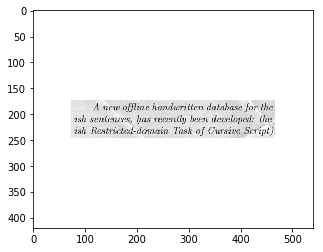

In [14]:
print(len(all_img))
for i in range(1,len(all_img)+1):
    im=all_img[i-1]
    plt.imshow(array_to_img(im),cmap="gray")
    plt.show()
    cv2.imwrite(r'E:\class note\2020-Fall\\'+str(i)+'.png',np.array(im))
    